<a href="https://colab.research.google.com/github/Thomas-D40/deep-learning/blob/main/Deep_Learning_pour_la_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Récupération des données mnist de Zalando

In [ ]:
import tensorflow as tf

In [ ]:
data = tf.keras.datasets.fashion_mnist
(training_image, training_labels), (test_image, test_labels) = data.load_data()

In [ ]:
training_image

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
training_image.shape

(60000, 28, 28)

In [ ]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'T-shirt/top')

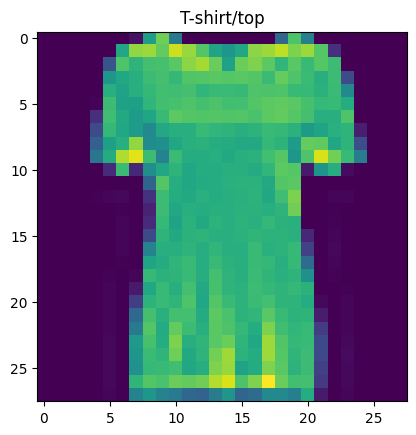

In [ ]:
plt.imshow(training_image[10])
plt.title(labels[training_labels[10]])

In [ ]:
training_image.min(), training_image.max()

(0, 255)

'T-shirt/top'

# Flatten: Transformation des données en vecteur

L'objectif est de passer d'une entrée au format (60000,28,28) à (60000,28*28) => Pour cela, on va faire une opération de flatten

In [ ]:
training_image.shape

(60000, 28, 28)

In [ ]:
flatten_training_image = training_image.reshape(-1,28*28)

In [ ]:
flatten_test_image = test_image.reshape(10000,28*28)

In [ ]:
flatten_training_image.shape

(60000, 784)

# Transformation des labels : One-Hot Encoding

Avoir une sortie avec un neuronne qui prédit un chiffre dans une approche de classification n'est pas forcément pertinent.

Par exemple, si mon objet est dans la catégorie 5 (Coat), que mon modèle prédit d'abord 3(Dress) puis 4(Sandals), il n'est pas pertinent de dire qu'il est plus proche de la réalité en prédisant Sandals qu'en prédisant Dress

## One-Hot Encoding

Si par exemple, on a trois classes de sorties: [0,1,2]
l'objectif serait de les redéfinir ainsi:
0 => [0,0,1]
1 => [0,1,0]
2 => [1,0,0]

On obtient ainsi une sortie sous le format (nbr_donnees, nbr_classes) et il faudrait alors 3 neuronnes à la fin sur lesquelles on applique la fonction sigmoide pour obtenir une résultat entre 0 et 1, qui représentera le % d'estimation que l'entrée correspond à la classe


On appelle cette approche One-Hot Encoding pour signifier que suite à cette transformation du label en vecteur, une seule valeur sera à 1, soit chaude

In [ ]:
training_labels = tf.keras.utils.to_categorical(training_labels)

In [ ]:
test_labels = tf.keras.utils.to_categorical(test_labels)

# La fonction Softmax

Sans aucune forme de normalisation, les résultats de la dernière couche de neuronnes où chacun va donner la probabilité que l'image appartienne à telle ou telle classe, la somme des résultats pourrait être supérieur à 1, ce qui n'est pas souhaitable

L'une des options pourrait être de faire une normalisation en divisant le résultat de chaque neuronne par la somme des résultats des différentes neuronnes.

In [ ]:
def normalisation(vect):
  r = np.array(vect)
  return r / sum(r)

In [ ]:
normalisation([6,3,2])

array([0.54545455, 0.27272727, 0.18181818])

In [ ]:
import numpy as np

def softmax(vect):
  r = np.exp(np.array(vect))
  return r / sum(r)

In [ ]:
softmax([6,3,2])

array([0.93623955, 0.04661262, 0.01714783])

L'objectif de softmax est de maximiser la prédiction et donc le calcul de l'erreur pour permettre à la propagation du gradient.

Sigmoid est d'ailleurs une softMax sur deux classes du fait qu'il ne prenne en entrée qu'une valeur numérique, là où Softmax peut prendre un vecteur

# Premier modèle de classification

Les valeurs associés à chaque pixel étant entre 0 et 255, on souhaite normaliser cela entre 0 et 1

In [ ]:
flatten_training_image = flatten_training_image / 255
flatten_test_image = flatten_test_image / 255

In [ ]:
flatten_training_image.min(), flatten_training_image.max()

(0.0, 1.0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # Stocastique Gradient Descent


model = Sequential([
    Dense(784, "sigmoid"),
    Dense(10, "softmax")
    ])

model.compile(SGD(learning_rate=0.01), "mse", metrics=["accuracy"])

h = model.fit(flatten_training_image, training_labels, epochs=5, validation_data=(flatten_test_image, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2183 - loss: 0.0896 - val_accuracy: 0.4760 - val_loss: 0.0860
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.4772 - loss: 0.0848 - val_accuracy: 0.4843 - val_loss: 0.0815
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.4745 - loss: 0.0802 - val_accuracy: 0.4933 - val_loss: 0.0765
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.4960 - loss: 0.0751 - val_accuracy: 0.5397 - val_loss: 0.0713
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.5533 - loss: 0.0698 - val_accuracy: 0.6060 - val_loss: 0.0665


# Cross Entropy ou Log Loss

Malgré un loss faible via le mse 0.07, l'accuracy n'est que de 54%

Avec un loss aussi faible, la rétropropagation de la dérivée de l'erreur par rapport aux paramètres sera très lente

Cross Entropy:
L = - log (P, Y) #Négatif car entre 0 et 1, log est négatif

Par exemple, j'ai un résultat [0.9, 0.05, 0.05]
CE = L = {
  -  moins log p si y = 1
  -  moins log (1 - p) si y = 0
  
}

MSE Vs Cross-entropy

In [ ]:
def mse(target, prediction):
  return (target - prediction) ** 2

def cross_entropy(target, prediction):
  return - (target * np.log(prediction) + (1 - target) * np.log(1 - prediction))

In [ ]:
prediction  = np.arange(0,1, 0.01)

In [ ]:
target = np.ones_like(prediction)

In [ ]:
loss_mse = mse(target, prediction)
loss_ce = cross_entropy(target, prediction)

<ipython-input-58-270bb6a2cbbc>:5: RuntimeWarning: divide by zero encountered in log
  return - (target * np.log(prediction) + (1 - target) * np.log(1 - prediction))


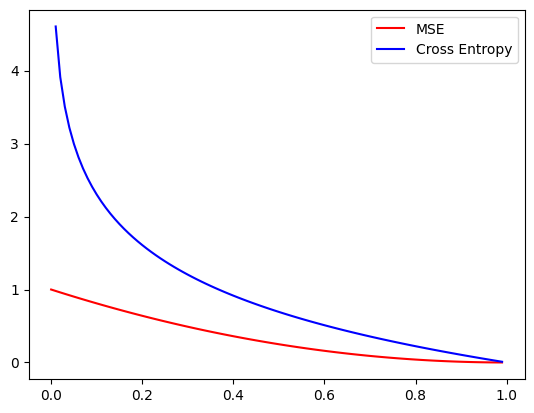

In [ ]:
import matplotlib.pyplot as plt

plt.plot(prediction, loss_mse, label="MSE", c="r")
plt.plot(prediction, loss_ce, label="Cross Entropy", c="b")
plt.legend(loc="upper right")
plt.show()

Le gradient lors d'une estimation à 0 alors que le model est à 1 est bien plus important avec le log loss que le mse

# Classification via cross-entropy

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # Stocastique Gradient Descent


model = Sequential([
    Dense(784, "sigmoid"),
    Dense(10, "softmax")
    ])

model.compile(SGD(learning_rate=0.01), "ce", metrics=["accuracy"])

h = model.fit(flatten_training_image, training_labels, epochs=5, validation_data=(flatten_test_image, test_labels))

Epoch 1/5
 154/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.2709 - loss: 2.1616

KeyboardInterrupt: 

MSE: accuracy: 0.5533 - loss: 0.0698 - val_accuracy: 0.6060 - val_loss: 0.0665

CE: accuracy: 0.8041 - loss: 0.5561 - val_accuracy: 0.8011 - val_loss: 0.5574

# Le problème avec la fonction Sigmoid - Une nouvelle fonction d'activation: ReLU (Rectified Linear Unit)

reLu => {
  - f(x) = x si x > 0
  - f(x) = 0 si x <= 0
}

In [ ]:
def reLu(vect):
  return np.maximum(0, vect)

In [ ]:
values = np.arange(-15,15,0.1)

sigmoid = tf.nn.sigmoid(values)
relu = tf.nn.relu(values)
relu_v2 = reLu(values)

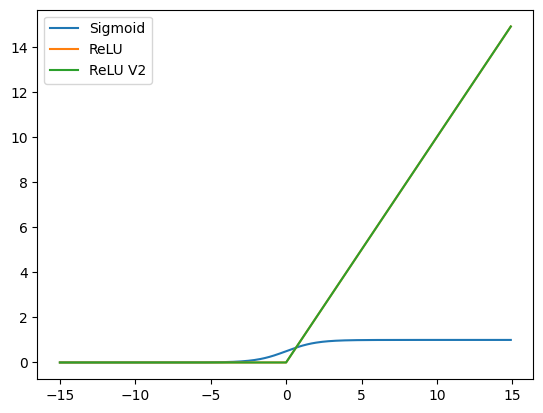

In [ ]:
plt.plot(values, sigmoid)
plt.plot(values, relu)
plt.plot(values, relu_v2)
plt.legend(["Sigmoid", "ReLU", "ReLU V2"], loc="upper left")
plt.show()

On parle de fonction d'activation pour reLU car s'il reçoit une valeur négative, il retourne 0, ce qui peut s'interpréter comme une inactivation du neuronne

# Entrainement avec ReLU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # Stocastique Gradient Descent


model = Sequential([
    Dense(784, "relu"),
    Dense(10, "softmax")
    ])

model.compile(SGD(learning_rate=0.01), "ce", metrics=["accuracy"])

h = model.fit(flatten_training_image, training_labels, epochs=5, validation_data=(flatten_test_image, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7079 - loss: 0.9352 - val_accuracy: 0.8114 - val_loss: 0.5551
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8293 - loss: 0.5071 - val_accuracy: 0.8278 - val_loss: 0.4991
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8421 - loss: 0.4609 - val_accuracy: 0.8345 - val_loss: 0.4697
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8502 - loss: 0.4357 - val_accuracy: 0.8379 - val_loss: 0.4565
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8577 - loss: 0.4114 - val_accuracy: 0.8433 - val_loss: 0.4428


Sigmoid: accuracy: 0.8041 - loss: 0.5561 - val_accuracy: 0.8011 - val_loss: 0.5574

ReLU: accuracy: 0.8577 - loss: 0.4114 - val_accuracy: 0.8433 - val_loss: 0.4428

# Réseaux de neuronnes plus complexes

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (32, 784)                   │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (32, 10)                    │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,292 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # Stocastique Gradient Descent


model = Sequential([
    Dense(784, "relu"),
    Dense(128, "relu"),
    Dense(10, "softmax")
    ])

model.compile(SGD(learning_rate=0.01), "ce", metrics=["accuracy"])

h = model.fit(flatten_training_image, training_labels, epochs=5, validation_data=(flatten_test_image, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7138 - loss: 0.9228 - val_accuracy: 0.8157 - val_loss: 0.5283
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8315 - loss: 0.4802 - val_accuracy: 0.8297 - val_loss: 0.4667
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8500 - loss: 0.4299 - val_accuracy: 0.8396 - val_loss: 0.4493
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8580 - loss: 0.4006 - val_accuracy: 0.8563 - val_loss: 0.4111
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8664 - loss: 0.3819 - val_accuracy: 0.8541 - val_loss: 0.4056


In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
  plt.plot(history['loss'], label="loss")
  plt.plot(history['val_loss'], label="val_loss")
  plt.plot(history['accuracy'], label="accuracy")
  plt.plot(history['val_accuracy'], label="val_accuracy")
  plt.title('model loss & accuracy')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(loc='best')

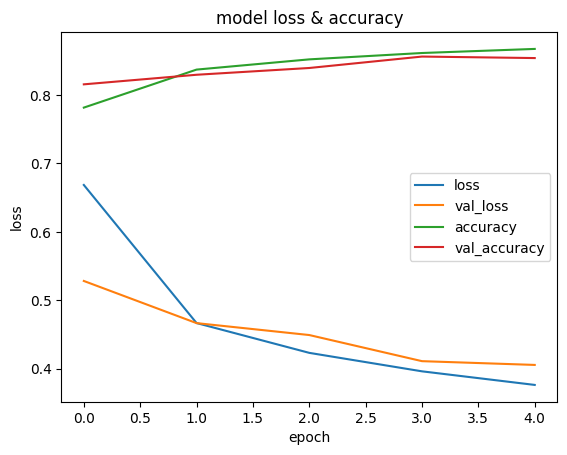

In [ ]:
plot_learning_curve(h.history)

Dans notre schéma, on remarque que l'écart entre loss et val_loss augmente.

Ceci s'appelle l'overfitting (surentrainement)

In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (32, 784)                   │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (32, 128)                   │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (32, 10)                    │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 717,212 (2.74 MB)

 Trainable params: 717,210 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Combattre l'overfitting : le DropOut

Le dropout signifie en temps normal le fait d'arrêter un programme.

En démultipliant le nombre de neuronnes et d'epochs, il semble se passer un phénomène de surentrainement de certains neuronnes, qui se spécialise tellement qu'ils faussent les résultats

L'intuition serait de pouvoir "désactiver" certains neuronnes sur certaines itérations/epochs


In [ ]:
dropout = tf.keras.layers.Dropout(0.2, input_shape=(2,1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
x = np.arange(1, 11).reshape(5,2).astype(np.float32)

In [ ]:
dropout(x, training=True)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 1.25,  2.5 ],
       [ 3.75,  5.  ],
       [ 6.25,  0.  ],
       [ 8.75, 10.  ],
       [11.25, 12.5 ]], dtype=float32)>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # Stocastique Gradient Descent


model = Sequential([
    Dense(784, "relu"),
    tf.keras.layers.Dropout(0.5),
    Dense(128, "relu"),
    tf.keras.layers.Dropout(0.3),
    Dense(10, "softmax")
    ])

model.compile(SGD(learning_rate=0.01), "ce", metrics=["accuracy"])

h = model.fit(flatten_training_image, training_labels, epochs=5, validation_data=(flatten_test_image, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6033 - loss: 1.1537 - val_accuracy: 0.8014 - val_loss: 0.5649
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.7900 - loss: 0.6003 - val_accuracy: 0.8240 - val_loss: 0.4913
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8179 - loss: 0.5188 - val_accuracy: 0.8357 - val_loss: 0.4554
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8306 - loss: 0.4813 - val_accuracy: 0.8438 - val_loss: 0.4302
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8400 - loss: 0.4506 - val_accuracy: 0.8488 - val_loss: 0.4155


5 Epochs:

Sans dropout : accuracy: 0.8664 - loss: 0.3819 - val_accuracy: 0.8541 - val_loss: 0.4056

Avec dropout: accuracy: 0.8400 - loss: 0.4506 - val_accuracy: 0.8488 - val_loss: 0.4155

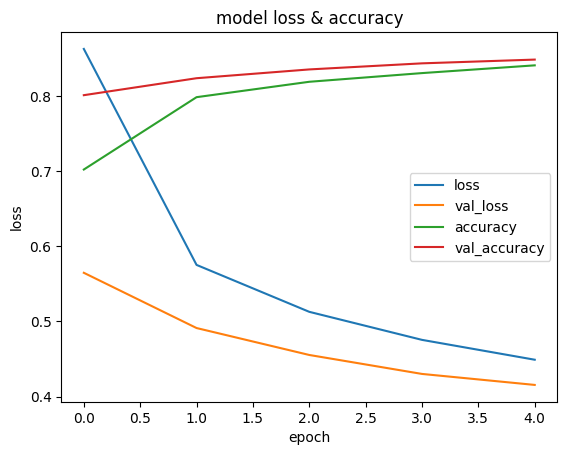

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
  plt.plot(history['loss'], label="loss")
  plt.plot(history['val_loss'], label="val_loss")
  plt.plot(history['accuracy'], label="accuracy")
  plt.plot(history['val_accuracy'], label="val_accuracy")
  plt.title('model loss & accuracy')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(loc='best')

plot_learning_curve(h.history)

Le nombre d'epoch étant faible, il existe toujours un écart entre loss et val_loss, néanmoins cet écart ne grossit pas sur le temps

# L'Optimizer Adam

Avec SGD, on a mis à jour le W en faisant:
W = W - lr * dL/dW

## Le Concept de Momentum

Dans certains cas, le dL/dW a tellement réduit du fait des neuronnes précédents tout en gardant la même direction, il peut être intéressant d'adapter le pas des premières couches pour rendre le tout plus efficace.

C'est cela que l'on appelle le Momentum

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # Stocastique Gradient Descent

adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)


model = Sequential([
    Dense(784, "relu"),
    tf.keras.layers.Dropout(0.5),
    Dense(128, "relu"),
    tf.keras.layers.Dropout(0.3),
    Dense(10, "softmax")
    ])

model.compile(adam, "ce", metrics=["accuracy"])

h = model.fit(flatten_training_image, training_labels, epochs=5, validation_data=(flatten_test_image, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.5926 - loss: 1.1719 - val_accuracy: 0.7374 - val_loss: 0.6780
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.6634 - loss: 0.9211 - val_accuracy: 0.7562 - val_loss: 0.6724
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.6754 - loss: 0.8968 - val_accuracy: 0.7656 - val_loss: 0.6335
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.6813 - loss: 0.8967 - val_accuracy: 0.7561 - val_loss: 0.6361
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.6799 - loss: 0.8807 - val_accuracy: 0.7733 - val_loss: 0.6300


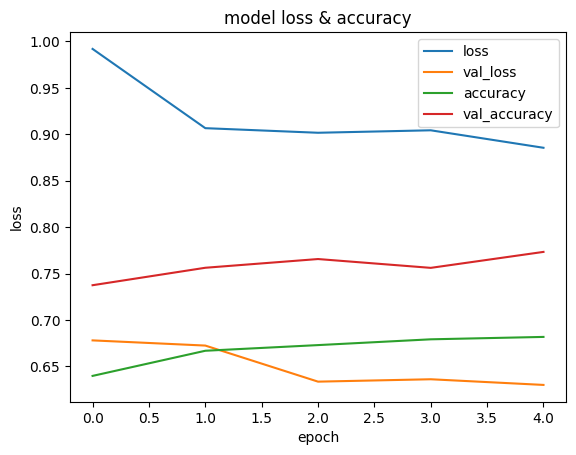

In [ ]:
plot_learning_curve(h.history)

# Sauvegarder la meilleure version du modèle - le Callback ModelCheckpoint

Au cours de l'entrainement, l'epoch 20 peut donner de meilleurs résultats que l'epoch 35.

L'objectif serait alors de garder la version du model de cette epoch

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

best_model = "best_model.keras"

model_ckp = ModelCheckpoint(filepath=best_model, monitor="val_accuracy", mode="max", save_best_only=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # Stocastique Gradient Descent

adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)


model = Sequential([
    Dense(784, "relu"),
    tf.keras.layers.Dropout(0.5),
    Dense(128, "relu"),
    tf.keras.layers.Dropout(0.3),
    Dense(10, "softmax")
    ])

model.compile(adam, "ce", metrics=["accuracy"])

h = model.fit(flatten_training_image,
              training_labels,
              epochs=30,
              validation_data=(flatten_test_image, test_labels),
              callbacks=[model_ckp]
              )

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.5878 - loss: 1.2168 - val_accuracy: 0.7439 - val_loss: 0.7105
Epoch 2/30
 713/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.6654 - loss: 0.9173

KeyboardInterrupt: 

In [ ]:
model_save = tf.keras.models.load_model(best_model)

In [ ]:
model_save.evaluate(flatten_test_image, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7447 - loss: 0.7100


[0.7105259895324707, 0.7439000010490417]

# Early Stopping: Arrêter l'entrainement en fonction de certaines conditions

In [ ]:
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # Stocastique Gradient Descent

adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)


model = Sequential([
    Dense(784, "relu"),
    tf.keras.layers.Dropout(0.5),
    Dense(128, "relu"),
    tf.keras.layers.Dropout(0.3),
    Dense(10, "softmax")
    ])

model.compile(adam, "ce", metrics=["accuracy"])

h = model.fit(flatten_training_image,
              training_labels,
              epochs=30,
              validation_data=(flatten_test_image, test_labels),
              callbacks=[model_ckp, stop]
              )

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.6100 - loss: 1.1298 - val_accuracy: 0.7623 - val_loss: 0.6573
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.6752 - loss: 0.8769 - val_accuracy: 0.7305 - val_loss: 0.7080
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.6919 - loss: 0.8777 - val_accuracy: 0.7814 - val_loss: 0.6445
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.6908 - loss: 0.8712 - val_accuracy: 0.7819 - val_loss: 0.6208
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.6891 - loss: 0.8978 - val_accuracy: 0.7717 - val_loss: 0.7190
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.6875 - loss: 0.9008 - val_accuracy: 0.7835 - val_loss: 0.6101
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.6926 - loss: 0.8810 - val_accuracy: 0.7675 - val_loss: 0.6557
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.6878 -

# Predictions

In [ ]:
model_save = tf.keras.models.load_model(best_model)
model_save.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (32, 784)                   │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (32, 784)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (32, 128)                   │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (32, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (32, 10)                    │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,151,632 (8.21 MB)

 Trainable params: 717,210 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,434,422 (5.47 MB)

In [ ]:
flatten_test_image[2500].shape

(784,)

In [ ]:
labels[np.argmax(test_labels[2500])]

'Shirt'

In [ ]:
pred = model_save.predict(flatten_test_image[2500].reshape(1,784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [ ]:
labels[np.argmax(pred)]

'Pullover'